## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data =pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combine_data.loc[combine_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_data


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combine_data[combine_data['Mouse ID'].isin(duplicate_data)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice = clean_data["Mouse ID"].nunique()
new_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
print(summary_stat)




              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [9]:
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Treatment')

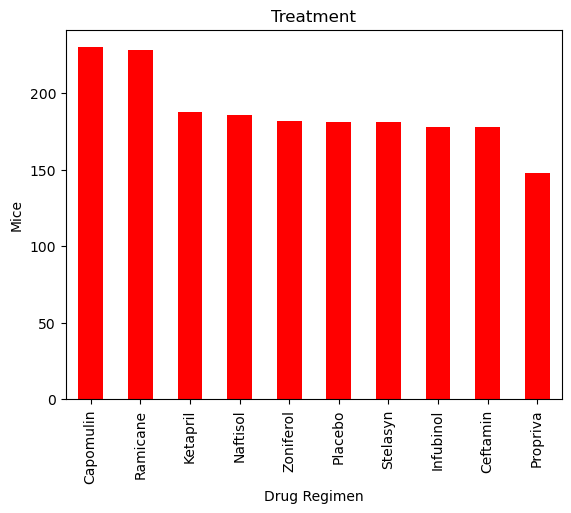

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_pandas = mice_count.plot.bar(color='red')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.title("Treatment")


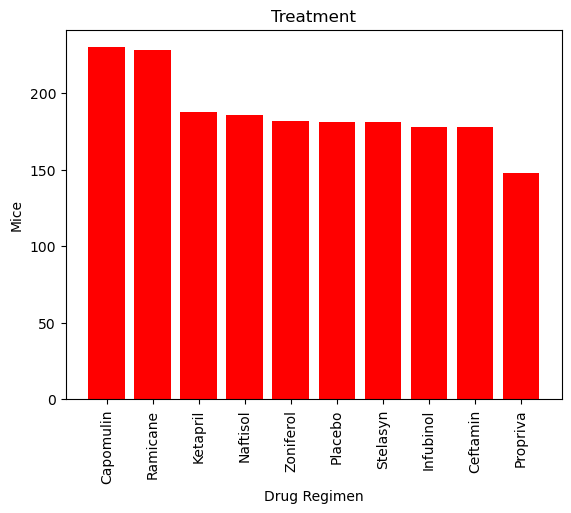

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values


plt.bar(x_axis, y_axis, color='red')

# Set the xlabel and ylabel, title using class methods
plt.title("Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.xticks(rotation=90)

plt.show()

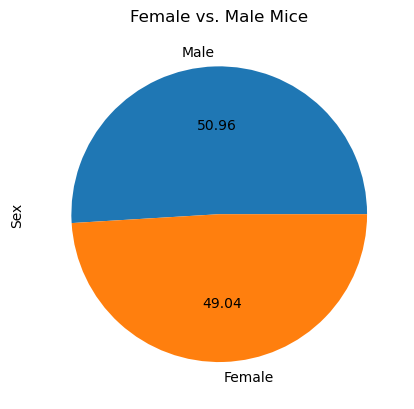

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
sex_data.plot.pie(autopct= '%.2f')
plt.show()

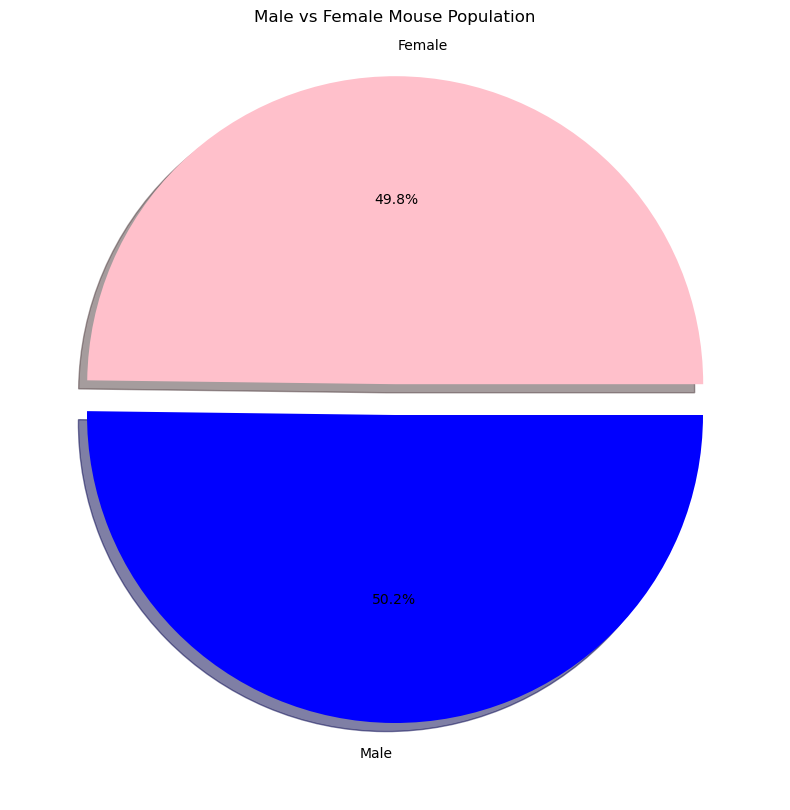

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.7999197, 50.200803]

#Set colors for each section of the pie
colors = ['pink', 'blue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,)
plt.title('Male vs Female Mouse Population')

plt.show()

## Quartiles, Outliers and Boxplots

In [26]:

#Calculate Quartiles, Find Outliers and Create a Box Plot
#calculate final tumor
clean_data

#get the latest timepoint for each mouse
top_four_df = clean_data.groupby(['Mouse ID'])
tfd = top_four_df["Timepoint"].max()
tf =tfd.reset_index()
tf

#merge latest timepont with cleaned data
cleaned_merge = pd.merge(clean_data,tf,how='inner',on=["Mouse ID",'Timepoint'])
cleaned_merge

drug_four = cleaned_merge.loc[(cleaned_merge["Drug Regimen"]=='Capomulin')|(cleaned_merge["Drug Regimen"]=='Ramicane')|
                            (cleaned_merge["Drug Regimen"]=='Infubinol')|(cleaned_merge["Drug Regimen"]=='Ceftamin'),:]

#put the four drugs in a list
drug_5 = list(drug_four["Drug Regimen"].unique())
drug_5


volume_1 =[]
for dr in drug_5:
 
    volume_1.append(drug_four.loc[drug_four["Drug Regimen"] == dr,"Tumor Volume (mm3)"])

volume_1



#get lower and upper quantiles from the volume_1 list and see what the outliers could be
quartiles_lower = np.quantile(volume_1,.25)
quartiles_upper = np.quantile(volume_1,.75)
quartiles_lower
quartiles_upper

print(f'Values below {round(quartiles_lower,2)} could be outliers.')
print(f'Values below {round(quartiles_upper,2)} could be outliers.')

Values below 37.19 could be outliers.
Values below 59.93 could be outliers.


## Line and Scatter Plots

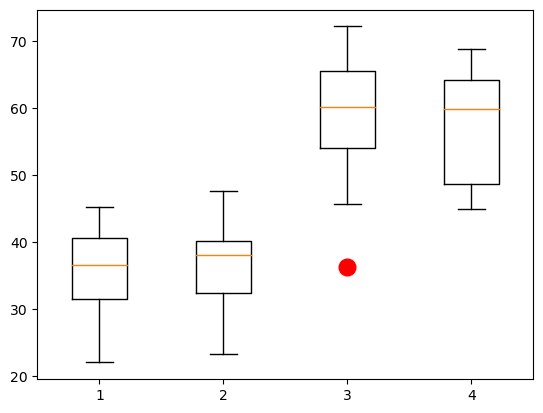

In [29]:
#box plot for the four final tumors
fig1,ax1 = plt.subplots()
graph = dict(marker = 'o',markerfacecolor ='r',markersize =12,
                  markeredgecolor='r')
ax1.boxplot(volume_1,flierprops=graph)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

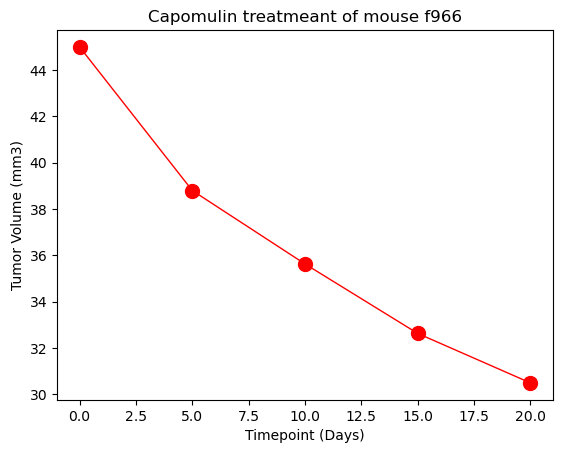

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "f966",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse f966')
plt.plot(x_axis, tumsiz,linewidth=1, markersize=10,marker="o",color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

C:\Users\ikran\AppData\Local\Temp\ipykernel_13156\2287430652.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

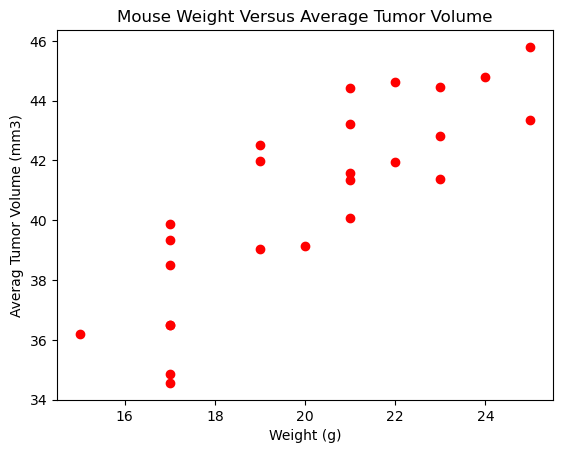

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=10
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Final Observation

The bar graph revealed that the Medication Regimen Capomulin had the greatest number of mice.

A correlation of 0.84 exists between mouse weight and average tumor volume. There is a significant positive association.

The Capomulin medication reduced the tumor in f966mouse over the duration of the trial.